# Lab 3

## Problem 1
#### A)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

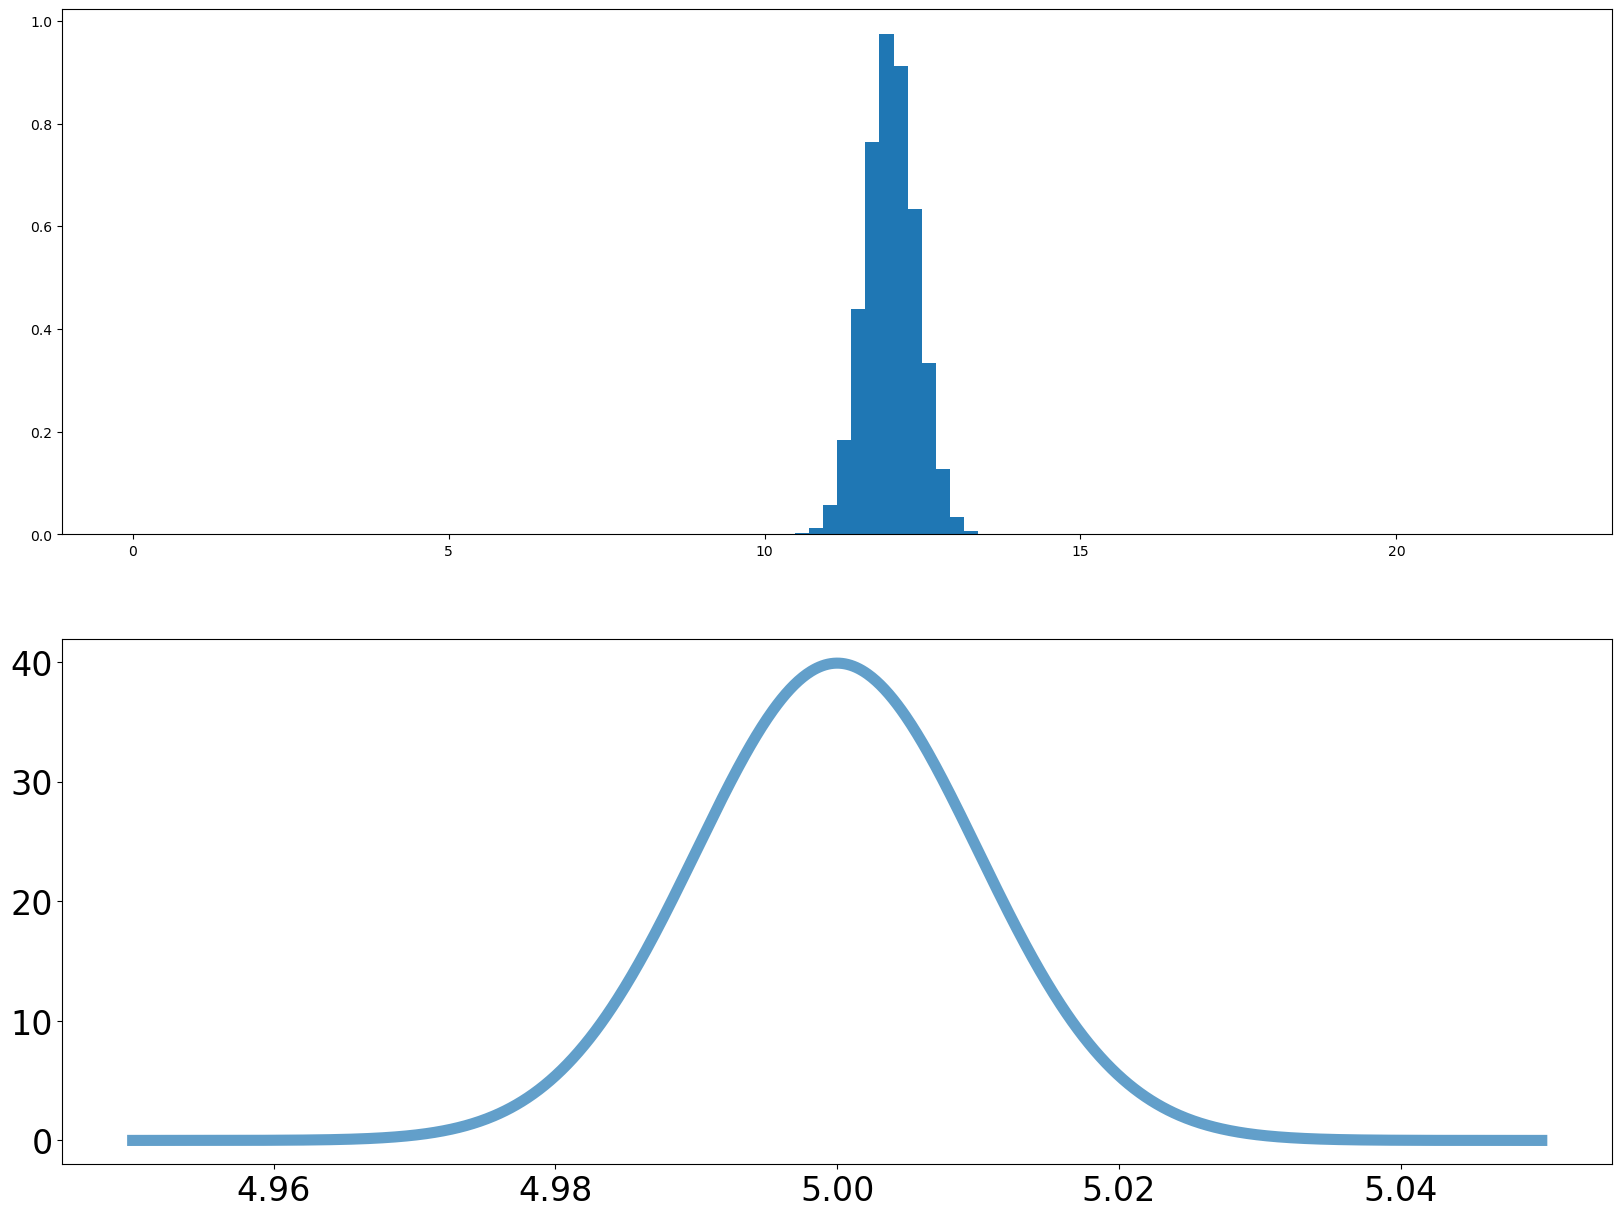

In [2]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(2, 1)
ax[0].hist(d,100, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(4.95,5.05,1000)
ax[1].plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

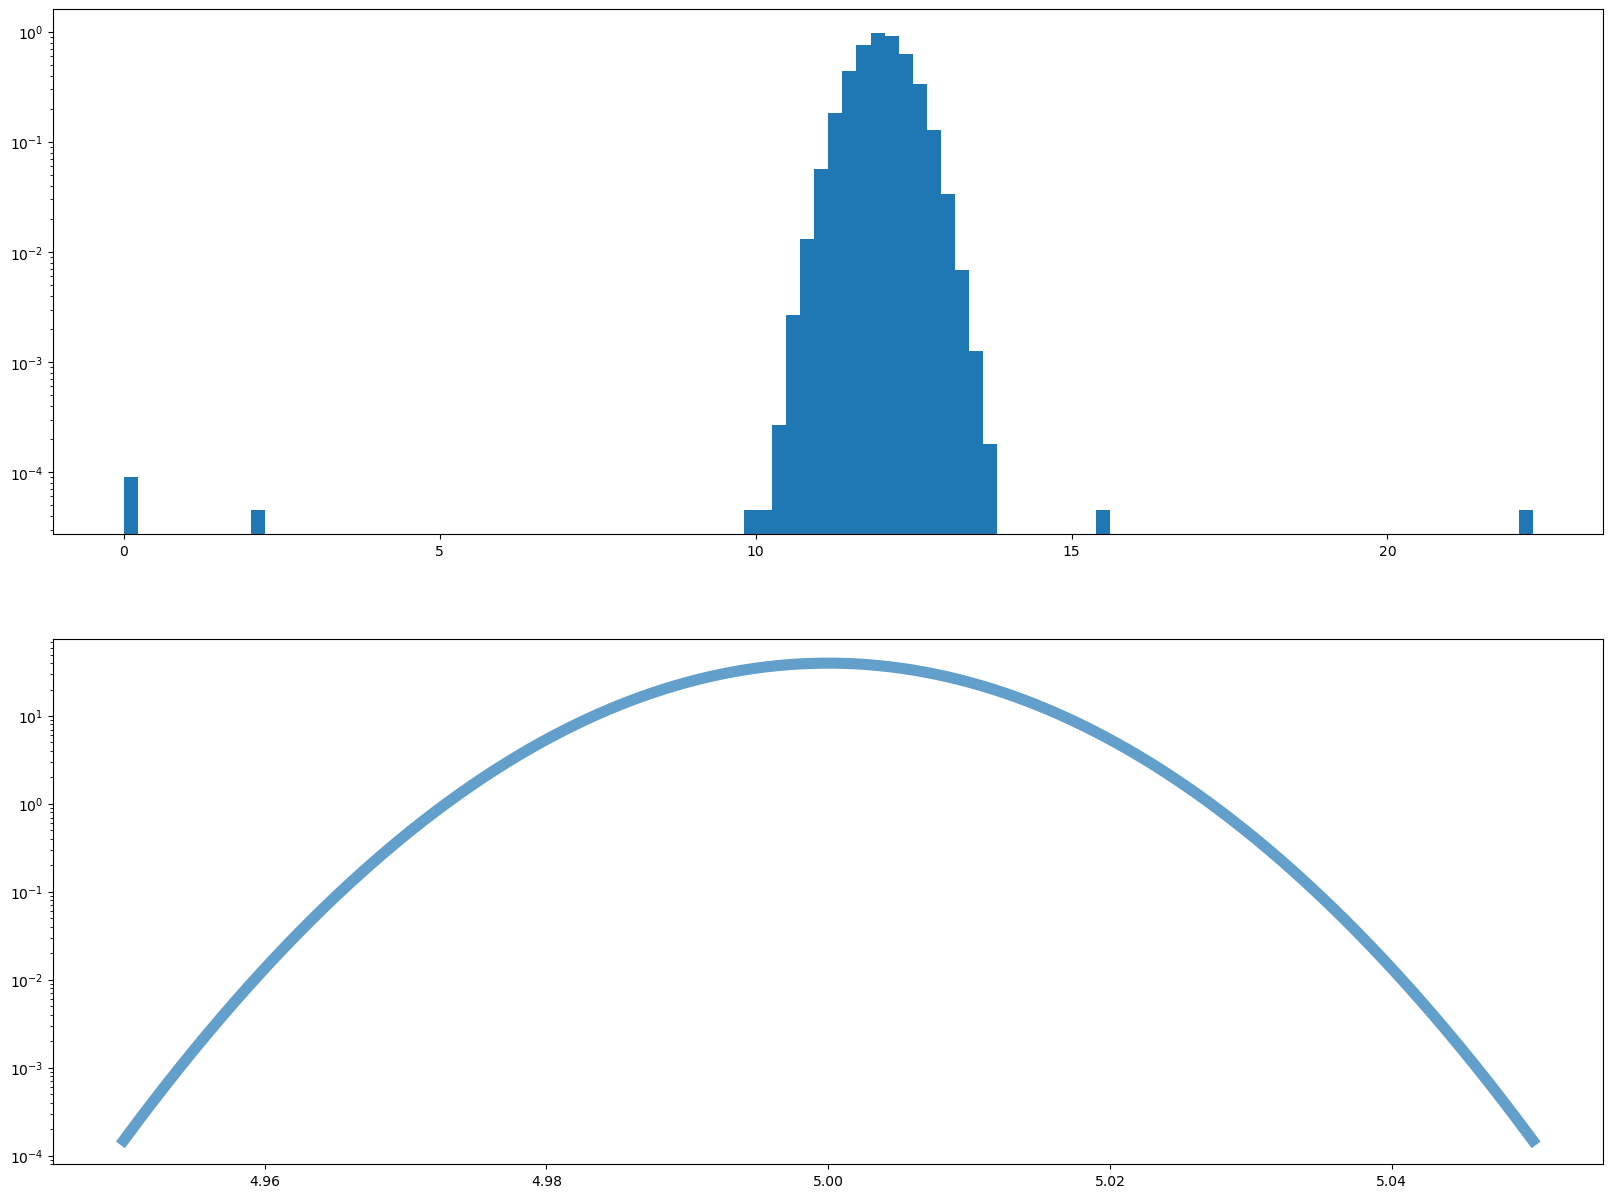

In [3]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(d,100, density=True)
ax[0].set_yscale('log')
x = np.linspace(4.95,5.05,1000)
ax[1].plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
ax[1].set_yscale('log')
plt.show()

##### 1.
By looking at the data that we have, we can see that if we are not using log plot, we can hardly tell the existance of any analmoluous data. In log plots, we can see that the pdf gives a perfect upside-down parabola which indicates normal distribution whereas the hist graph clearly shows the existance of some analmolies.

##### 2.
What is the probabilities of our observation is from the normal distributed background constituted by the correct readings rather than a analmoly?

We choose this question because in this problem, the correct readings are the background and the rare events are the analmolies. Therefore, we want to find out these signals wchich are assembled by analmolies and to rule them out.

##### 3.

$1-\int_{-\inf}^{x_0} pdf(x)dx$

##### 4.

In [4]:
true = np.array([])
false = np.array([])
for i in d:
    sigma = stats.norm.ppf(1 - stats.norm.cdf(i, loc = 12., scale = 0.4))
    if np.abs(sigma) < 5:
        true = np.append(true, i)
    else:
        false = np.append(false, i)
print(len(true))
print(len(false))

100003
5


In [5]:
print(false)

[ 2.1  0.   0.  15.6 22.3]


In [6]:
df = pd.DataFrame(np.array([[0, 'Your Test Good', 'Your Test Bad'], 
                           ['True T', 100000, len(true)-100000],
                           ['Bad T', 0, len(false)]]))
df

,0,1,2
0,0,Your Test Good,Your Test Bad
1,True T,100000,3
2,Bad T,0,5


#### B)

In our experiment, we did not throw out any good data. This depends on the threshold we choose for our sigma which would determine the probabilities of the rare analmolies to occur. For our choice sigma=5, the probabilities of analmolies is 1/3.5e6. With smaller sigma value, the chance of throwing out good values will increase, meanwhile the accuracy of the model will be better because the chance of throwing out bad values will also increase.

#### C)

In our case, there are 3 bad data getting in. Two of the bad data can be avoidable without losing good data whereas one of them is really hard to get rid off. These bad data also depend on our statistical threshold sigma. When decreasing the sigma from 5, we can avoid counting more bad data in, vice, when increasing the sigma, we will include more bad data.

## Problem 2

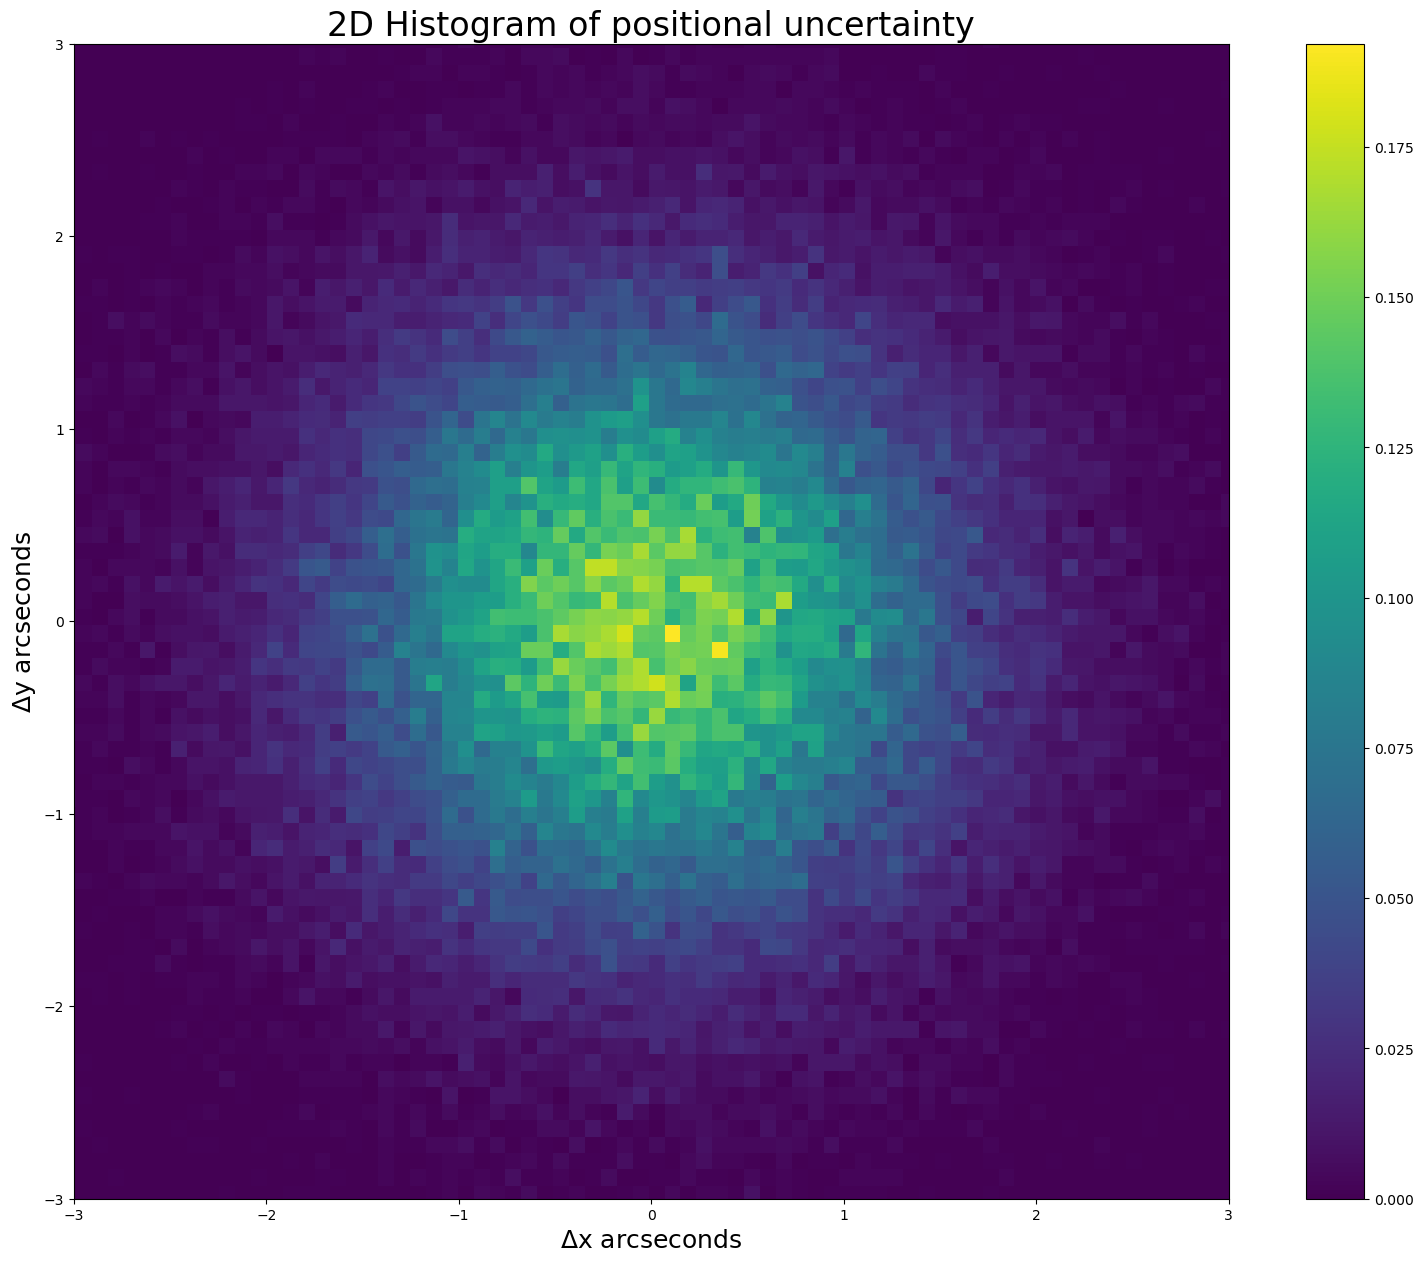

In [7]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### 1. 

What is the probability of finding the asteroid movement rather than just observing background due to atmospheric and instrumental interferences?

#### 2. 

$1-\int_{-\inf}^{x_0}rayleigh.pdf(x)dx$

#### 3.

In [8]:
sigma5 = 1/3.5e6
det = stats.rayleigh.ppf(1-sigma5)
det

5.489676406965609

From the above calculation, the 5.489 arcseconds distance would give us 5 sigma detetion of motion.

## Problem 3

#### 1.

What is the probability that our observations of cosmic rays are not due to cosmic background noises?

#### 2.

$1-\int_{-\inf}^{x_0}poisson.pdf(x)dx$

#### 3.

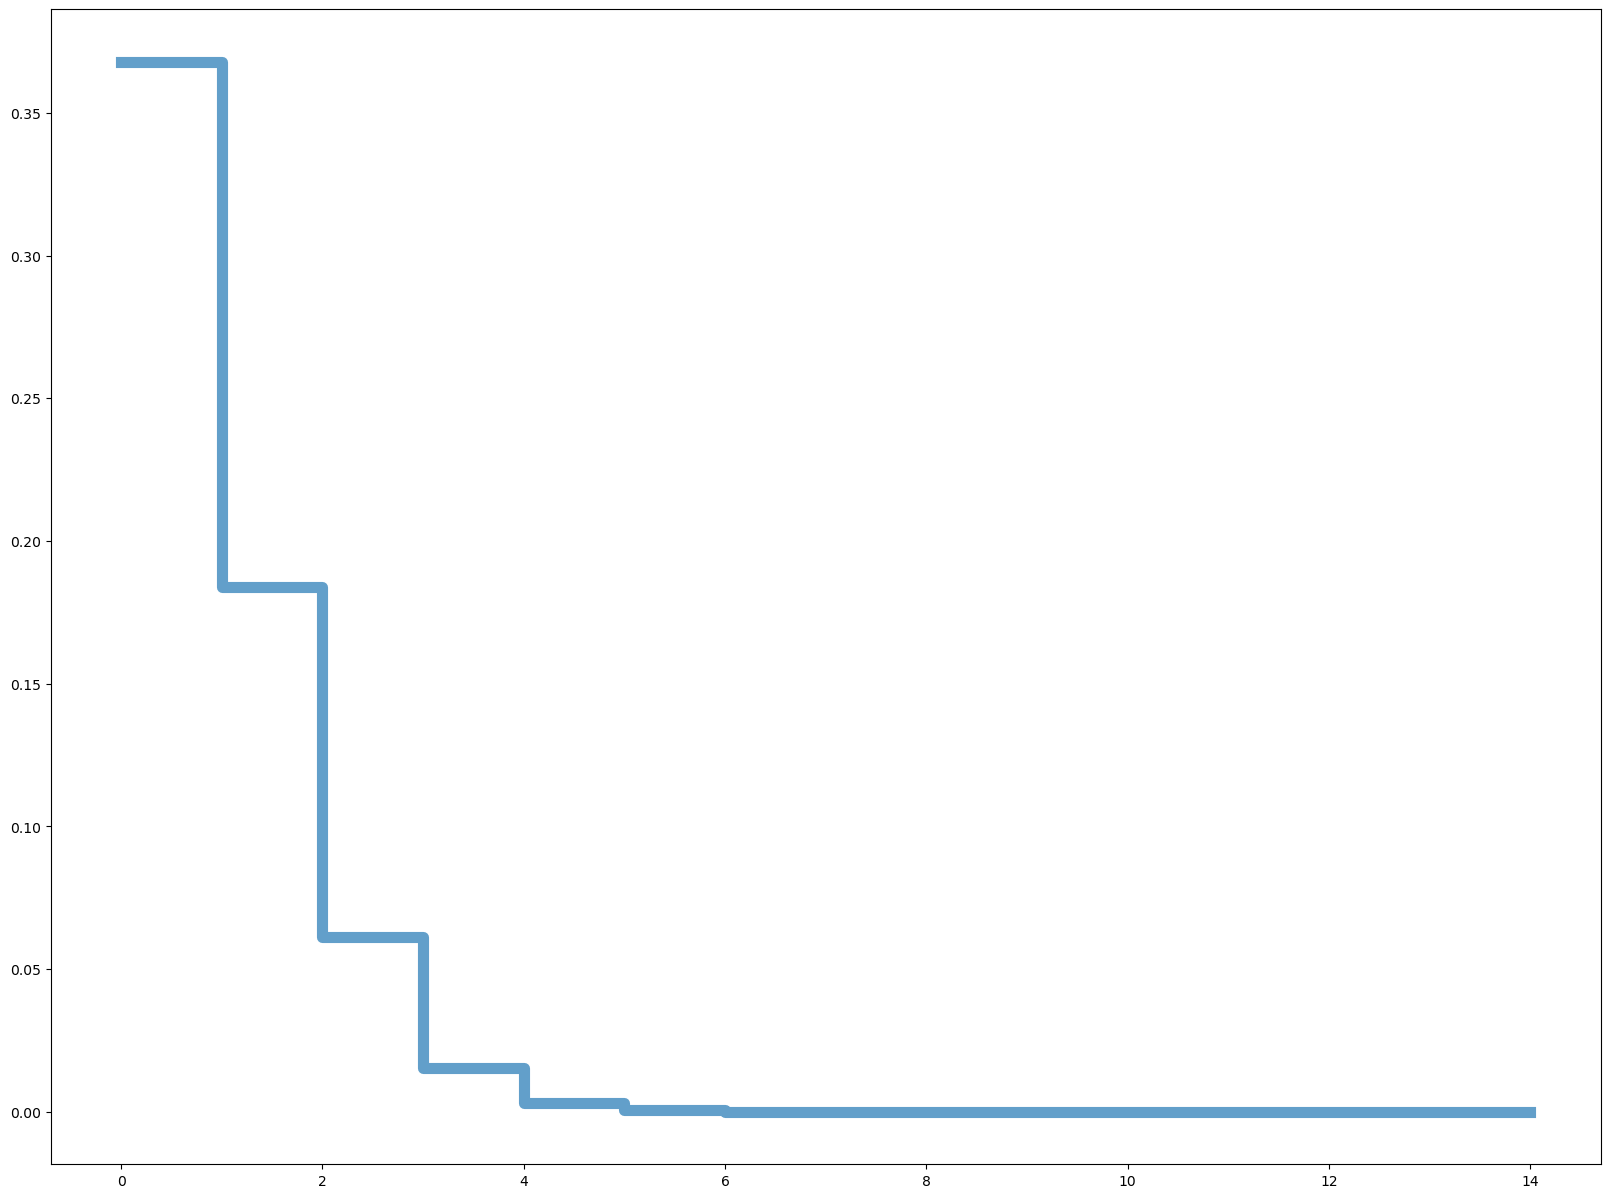

In [9]:
x = np.arange(0, 15)
avgBackground = 1
pmf = stats.poisson.pmf(x, avgBackground)
fig, ax = plt.subplots(1, 1)
ax.step(x, pmf, linewidth = 8, alpha = 0.7)

In [10]:
mu = 1*60*8*15
sigma = stats.norm.ppf(1-stats.poisson.cdf(6800, mu))
sigma

4.750747965778662

The sigma of 6800 observations with average detection of 7200 is less than 5 which means that it is non-significant. 